# Wine Quality Division

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, r2_score, mean_absolute_error, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, learning_curve, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('dados_modelo/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
X = df.drop(columns='quality')
y= df['quality']

In [8]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42, shuffle=True, stratify=y)

In [10]:
y_test.value_counts()

0    207
1     33
Name: quality, dtype: int64

In [11]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,1
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,0
187,7.7,0.705,0.10,2.60,0.084,9.0,26.0,0.99760,3.39,0.49,9.7,0
1148,7.8,0.390,0.42,2.00,0.086,9.0,21.0,0.99526,3.39,0.66,11.6,0
465,10.0,0.290,0.40,2.90,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,0


In [12]:
df_train['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [13]:
numero_de_y0  = df_train['quality'].value_counts()[1]
numero_de_y0

184

In [14]:
df_train_0 = df_train[df_train['quality'] == 1].copy()
df_train_1 = df_train[df_train['quality'] == 0].sample(n=numero_de_y0, replace=False) # balanceando

In [15]:
df_balanceado = pd.concat([df_train_0, df_train_1], axis=0)

In [16]:
df_balanceado['quality'].value_counts()

1    184
0    184
Name: quality, dtype: int64

In [17]:
X= df_balanceado.drop(columns='quality')
y= df_balanceado['quality']

In [18]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42, stratify=y, test_size= 0.2) # balanceado

In [19]:
y_validation.value_counts()

1    37
0    37
Name: quality, dtype: int64

In [20]:
X_train_sc = StandardScaler().fit_transform(X_train)
X_validation_sc = StandardScaler().fit_transform(X_validation)
X_test_sc = StandardScaler().fit_transform(X_test)

In [89]:
def escolha_hiper(hiper_list, X_train, y_train):
    training_error = []
    validation_error = []

    for hiper in hiper_list:
        numero_kfold = round(len(X_train)**0.5)
        kf = StratifiedKFold(n_splits=numero_kfold, shuffle=True, random_state=42)

        estimador = DecisionTreeClassifier(max_depth=hiper)

        cv_scores = cross_validate(estimator=estimador, X=X_train, y=y_train,
                                   scoring='f1',
                                    cv=kf, return_train_score=True)
        
        training_error.append(np.mean(cv_scores['train_score']))
        validation_error.append(np.mean(cv_scores['test_score']))
        
        
    plt.plot(hiper_list, training_error)
    plt.plot(hiper_list, validation_error)
    
    plt.title('Erros de treino e validação em função de Max_Depth')
    plt.ylabel('f1')
    plt.xlabel('max_depth')
    plt.legend(['Treinamento', 'Validação'])

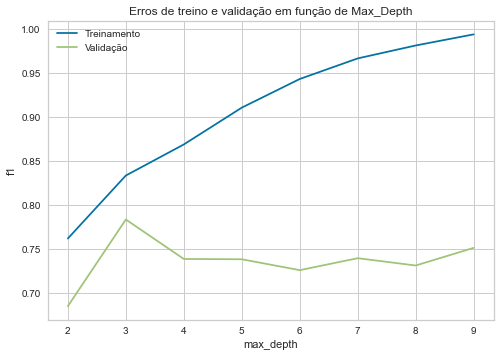

In [90]:
escolha_hiper(range(2, 10), X_train_sc, y_train)

In [81]:
estimador = DecisionTreeClassifier(max_depth = 5, random_state= 42)
estimador.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [82]:
y_pred = estimador.predict(X_validation_sc)

In [83]:
print(f1_score(y_validation,y_pred), '\n')
print(classification_report(y_validation, y_pred))

0.65625 

              precision    recall  f1-score   support

           0       0.66      0.84      0.74        37
           1       0.78      0.57      0.66        37

    accuracy                           0.70        74
   macro avg       0.72      0.70      0.70        74
weighted avg       0.72      0.70      0.70        74



In [84]:
y_pred = estimador.predict(X_test_sc)

print(f1_score(y_test,y_pred), '\n')
print(classification_report(y_test, y_pred))

0.41059602649006627 

              precision    recall  f1-score   support

           0       0.98      0.58      0.73       207
           1       0.26      0.94      0.41        33

    accuracy                           0.63       240
   macro avg       0.62      0.76      0.57       240
weighted avg       0.88      0.63      0.69       240



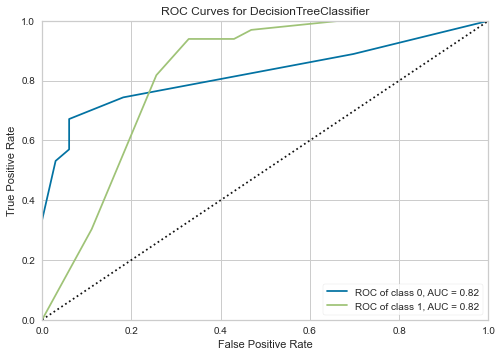

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(estimador, classes=[0, 1], micro=False, macro=False)

visualizer.fit(X_train_sc, y_train)
visualizer.score(X_test_sc, y_test)

visualizer.show()

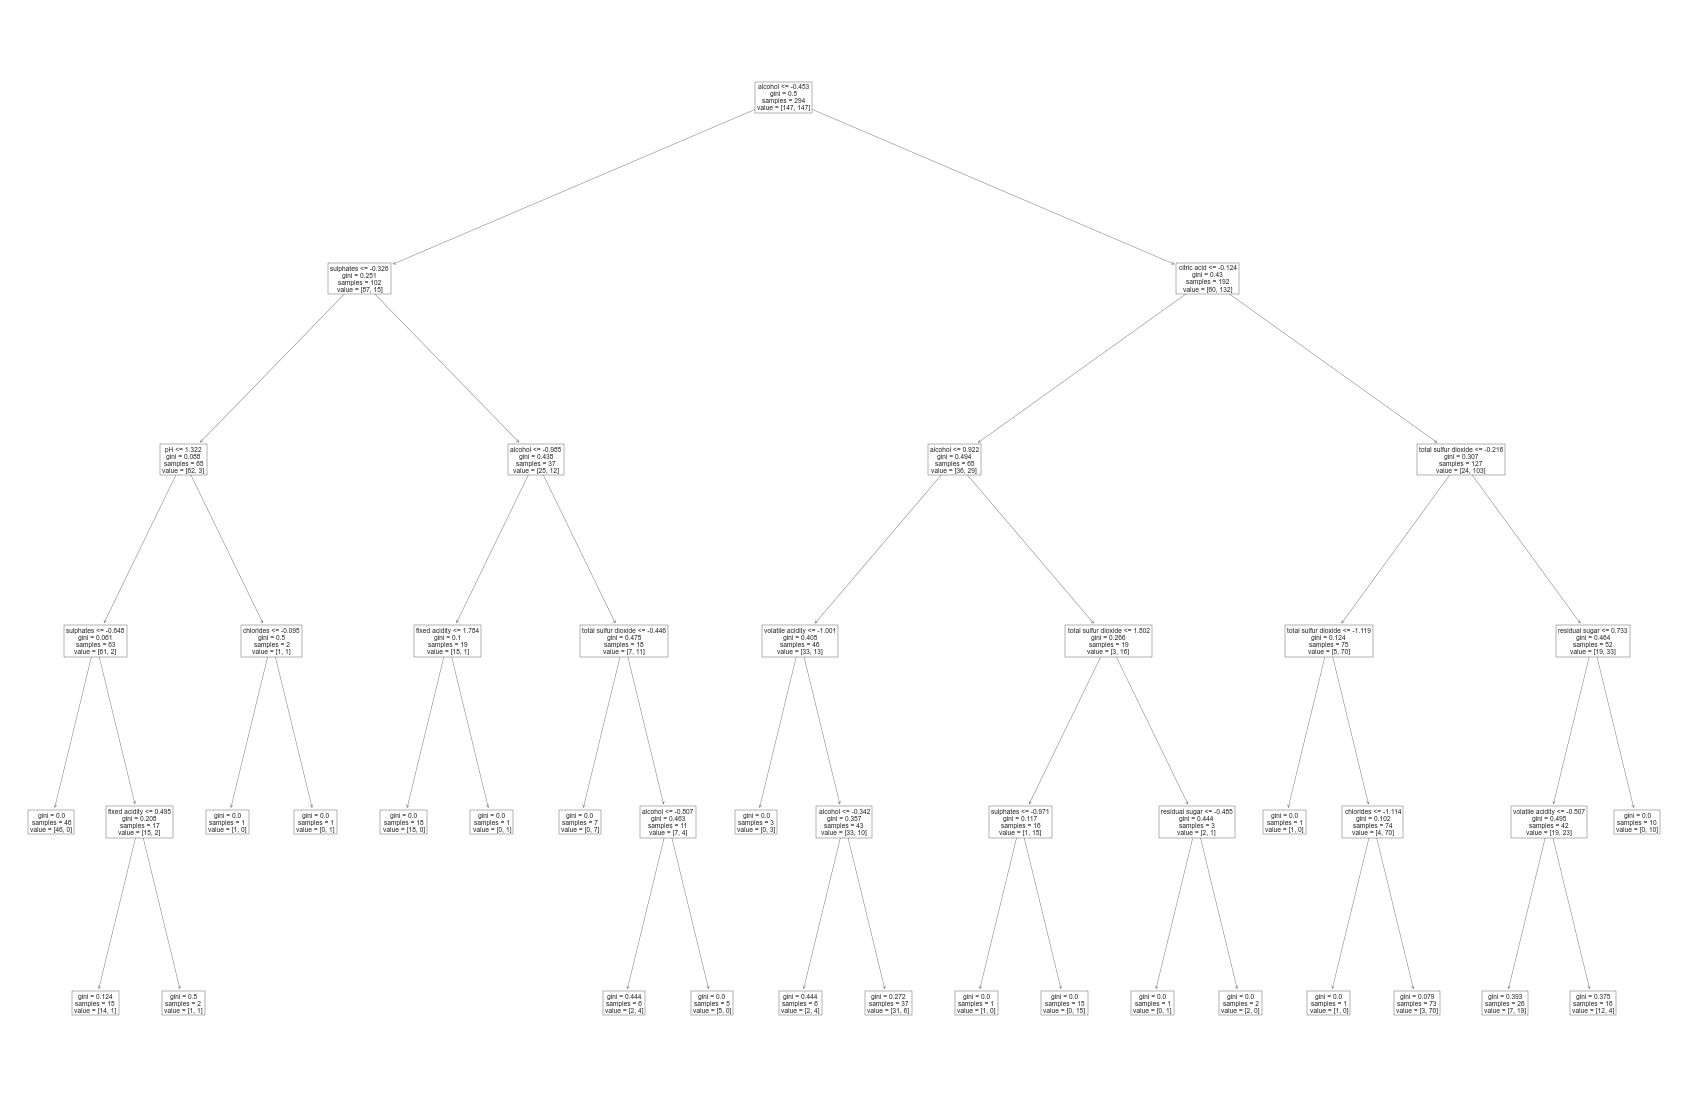

In [86]:
plt.figure(figsize=(30, 20))
tree.plot_tree(estimador, feature_names=X_train.columns)
plt.show()